In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
battles = pd.read_csv("/home/wallace/Documents/Datasets/battles.csv")

In [3]:
battles

,isqno,war,name,locn,campgn,postype,post1,post2,front,depth,...,is_hero,war2,war3,war4,war4_theater,dbpedia,cow_warno,cow_warname,war_initiator,parent
0,1,NETHERLAND'S WAR OF INDEPENDENCE,NIEUPORT,SPANISH FLANDERS,NIEUPORT 1600,0,HD,NaN,0.0,0.0,...,1,NETHERLAND'S WAR OF INDEPENDENCE,NETHERLAND'S WAR OF INDEPENDENCE,Eighty Years War of 1568-1648,NaN,http://dbpedia.org/resource/Battle_of_Nieuwpoort,NaN,NaN,0,NaN
1,2,THIRTY YEAR'S WAR,WHITE MOUNTAIN,BOHEMIA,BOHEMIA 1620,1,HD,PD,1.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_White_Mo...,NaN,NaN,0,NaN
2,3,THIRTY YEAR'S WAR,WIMPFEN,PALATINATE,PALATINATE 1622,0,HD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Wimpfen,NaN,NaN,0,NaN
3,4,THIRTY YEAR'S WAR,DESSAU BRIDGE,ANHALT,DANISH INVASION OF GERMANY 1625-26,0,PD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Dessau_B...,NaN,NaN,1,NaN
4,5,THIRTY YEAR'S WAR,LUTTER,BRUNSWICK,DANISH INVASION OF GERMANY 1625-26,0,HD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Lutter,NaN,NaN,0,NaN
5,6,THIRTY YEAR'S WAR,BREITENFELD I,SAXONY,LEIPZIG 1631,0,HD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Breitenf...,NaN,NaN,0,NaN
6,7,THIRTY YEAR'S WAR,THE LECH,BAVARIA,BAVARIA 1632,0,PD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Rain,NaN,NaN,1,NaN
7,8,THIRTY YEAR'S WAR,ALTE VESTE,FRANCONIA,NUREMBERG 1632,0,PD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_the_Alte...,NaN,NaN,1,NaN
8,9,THIRTY YEAR'S WAR,LUETZEN,SAXONY,SAXONY 1632,0,HD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Lützen_(...,NaN,NaN,1,NaN
9,10,THIRTY YEAR'S WAR,NORDLINGEN I,BAVARIA,BAVARIA 1634,0,PD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Nördling...,NaN,NaN,1,NaN


In [4]:
pg = battles["locn"].unique()
pg2 = battles["locn"].value_counts()
pg2

FRANCE                 125
ITALY                   72
EGYPT                   34
OKINAWA                 28
VIRGINIA                27
GERMANY                 25
USSR                    23
SYRIA                   20
AUSTRIA                 14
KOREA                   12
SAXONY                  11
MANCHURIA               11
BELGIUM                 11
SINAI                    8
SPAIN                    7
SPANISH NETHERLANDS      7
ENGLAND                  7
POLAND                   6
GOLAN                    6
JORDAN                   6
TENNESSEE                6
PRUSSIA                  6
PALESTINE                6
SCOTLAND                 6
NORTH ITALY              6
BAVARIA                  6
TUNISIA                  6
MEXICO                   6
BOHEMIA                  6
SILESIA                  6
                      ... 
VIET NAM                 1
MORAVIA                  1
VENETIA                  1
FRANCONIA                1
SPANISH FLANDERS         1
ALABAMA                  1
T

In [5]:
battles["wina"].unique()
battles["wina"].value_counts()

1.0    398
0.0     43
Name: wina, dtype: int64

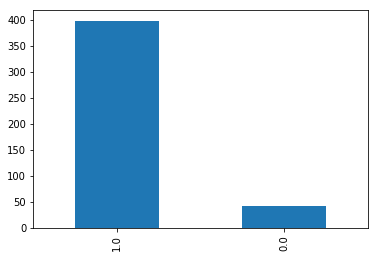

In [6]:
battles["wina"].value_counts().plot.bar()

In [7]:
battles['wina'].mean()

0.9024943310657596

In [8]:
def truncar(locn):
    return locn[:3]

pt = battles["locn"].apply(truncar)
pt

0      SPA
1      BOH
2      PAL
3      ANH
4      BRU
5      SAX
6      BAV
7      FRA
8      SAX
9      BAV
10     BRA
11     SAX
12     FRA
13     WUE
14     SWA
15     BOH
16     BAV
17     BAV
18     FRA
19     ENG
20     ENG
21     SCO
22     SCO
23     ENG
24     ENG
25     ENG
26     SCO
27     ENG
28     FRA
29     SPA
      ... 
630    KOR
631    KOR
632    KOR
633    KOR
634    KOR
635    KOR
636    SOV
637    GOL
638    GOL
639    GOL
640    GOL
641    GOL
642    GOL
643    ITA
644    LEB
645    SIN
646    SIN
647    SIN
648    SIN
649    SIN
650    SIN
651    SIN
652    SIN
653    VIE
654    WES
655    WES
656    NOR
657    NOR
658    NOR
659    NOR
Name: locn, Length: 660, dtype: object

In [9]:
battles2 = pd.DataFrame({'Pais' : [pt], 'Win' : ["wina"]})

battles2.to_csv("test.csv")

pd.read_csv("test.csv")

,Unnamed: 0,Pais,Win
0,0,0 SPA\n1 BOH\n2 PAL\n3 ANH...,wina


In [10]:
battles['wina'].head()
#battles['wina'].shape

0    NaN
1    1.0
2    1.0
3    NaN
4    1.0
Name: wina, dtype: float64

In [11]:
battles.describe()

,isqno,postype,front,depth,time,aeroa,surpa,cea,leada,trnga,...,plana,surpaa,mana,logsaa,fortsa,deepa,is_hero,cow_warno,war_initiator,parent
count,660.000000,660.000000,613.000000,613.000000,613.000000,568.000000,645.000000,543.000000,525.000000,523.000000,...,570.000000,611.000000,596.000000,609.000000,291.000000,461.000000,660.000000,510.000000,660.000000,36.000000
mean,330.500000,0.874242,0.071778,0.057096,0.047308,0.403169,0.462016,0.298343,0.380952,0.237094,...,0.366667,0.301146,0.233221,0.062397,0.017182,0.049892,0.909091,179.823529,0.403030,394.555556
std,190.669872,2.317893,0.258331,0.232216,0.212471,0.490967,0.839920,0.532467,0.601857,0.480661,...,0.527565,0.550096,0.450177,0.248776,0.130173,0.263144,0.287698,141.836787,0.490879,57.944034
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,304.000000
25%,165.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,106.000000,0.000000,366.250000
50%,330.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,139.000000,0.000000,373.000000
75%,495.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,151.000000,1.000000,461.750000
max,660.000000,9.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,718.000000,1.000000,498.000000


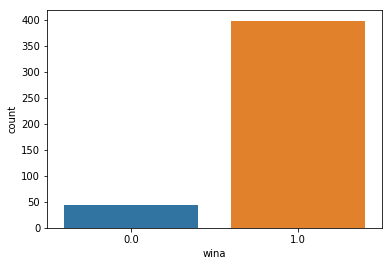

In [12]:
import seaborn as sns
status = sns.countplot(battles['locn'])
contry = sns.countplot(battles['wina'])

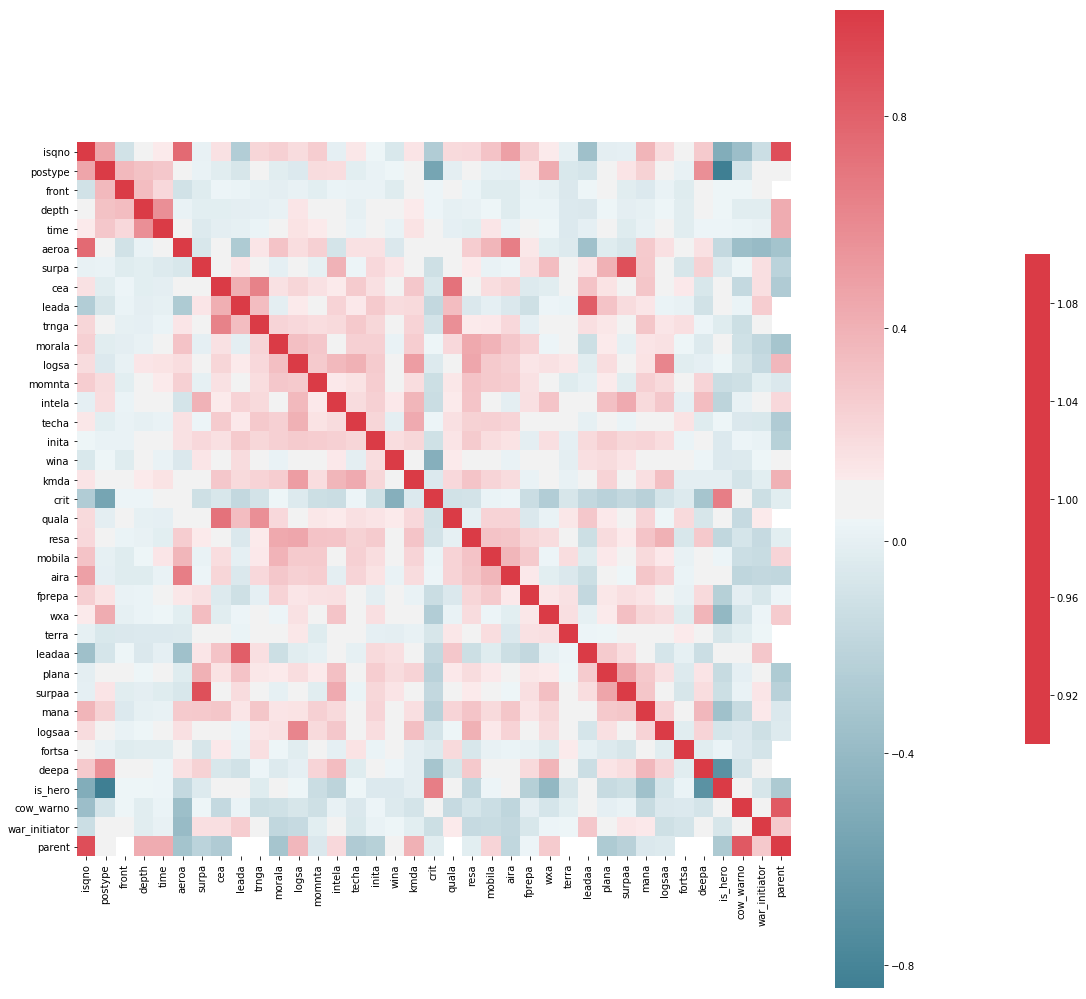

In [13]:
corr = battles[['wina', 'locn', 'postype',]]
corr = battles[['is_hero', 'war_initiator', 'parent']]
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(20,18))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=1, center = 0, square = True, linewidth = .5,cbar_kws={"shrink": .5})
corr = battles.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype = np.bool), cmap=sns.diverging_palette(220,10,as_cmap = True), square = True, ax = ax)
f.savefig('myimage.png', format="png", dpi=1200)

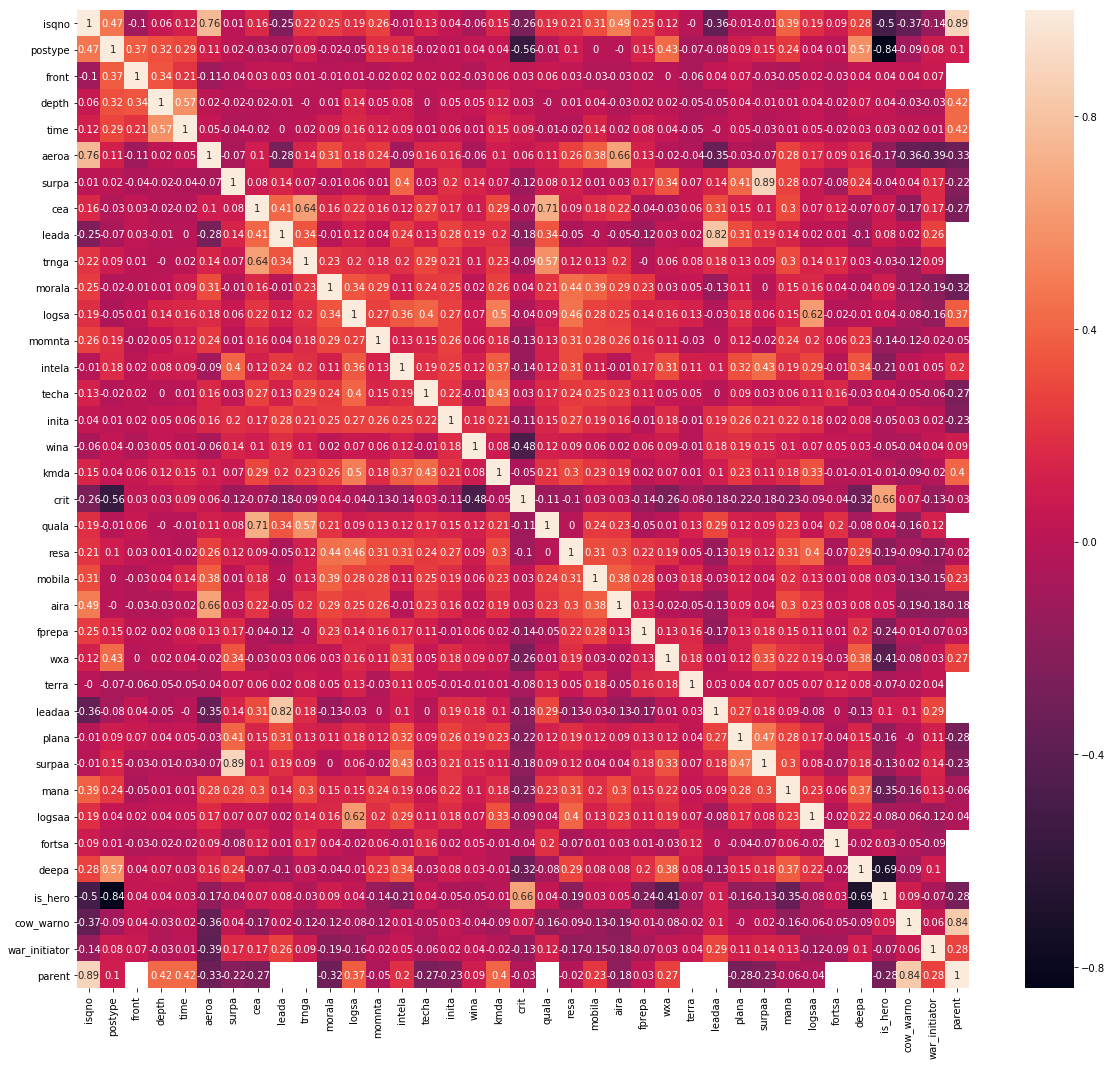

In [22]:
matriz = battles.corr().round(2)
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(data=matriz, annot=True)
f.savefig('myimage2.png', format="png", dpi=1200)

In [15]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 49 columns):
isqno            660 non-null int64
war              660 non-null object
name             660 non-null object
locn             660 non-null object
campgn           660 non-null object
postype          660 non-null int64
post1            658 non-null object
post2            124 non-null object
front            613 non-null float64
depth            613 non-null float64
time             613 non-null float64
aeroa            568 non-null float64
surpa            645 non-null float64
cea              543 non-null float64
leada            525 non-null float64
trnga            523 non-null float64
morala           615 non-null float64
logsa            602 non-null float64
momnta           621 non-null float64
intela           578 non-null float64
techa            619 non-null float64
inita            601 non-null float64
wina             441 non-null float64
kmda             591 non-null f

In [16]:
surpa = battles['surpa'].corr(battles['wina'], method = 'pearson')
leada = battles['leada'].corr(battles['wina'], method = 'pearson')
intela = battles['intela'].corr(battles['wina'], method = 'pearson')
inita = battles['inita'].corr(battles['wina'], method = 'pearson')

print("-- Method Pearson --")
print('surpa', surpa)
print('leada', leada)
print('intla', intela)
print('inita', inita)

-- Method Pearson --
surpa 0.1374318164300901
leada 0.1901264712984609
intla 0.12473215308099676
inita 0.18280852148264204


In [17]:
surpa = battles['surpa'].corr(battles['wina'], method = 'kendall')
leada = battles['leada'].corr(battles['wina'], method = 'kendall')
intela = battles['intela'].corr(battles['wina'], method = 'kendall')
inita = battles['inita'].corr(battles['wina'], method = 'kendall')

print("-- Method kendall --")
print('surpa', surpa)
print('leada', leada)
print('intla', intela)
print('inita', inita)

-- Method kendall --
surpa 0.1411921523352932
leada 0.19371334949113125
intla 0.12732740228689163
inita 0.18368706057792517


In [18]:
surpa = battles['surpa'].corr(battles['wina'], method = 'spearman')
leada = battles['leada'].corr(battles['wina'], method = 'spearman')
intela = battles['intela'].corr(battles['wina'], method = 'spearman')
inita = battles['inita'].corr(battles['wina'], method = 'spearman')

print("-- Method spearman --")
print('surpa', surpa)
print('leada', leada)
print('intla', intela)
print('inita', inita)

-- Method spearman --
surpa 0.14758888336373566
leada 0.19926776758380102
intla 0.12959965788742372
inita 0.1863310891863099


In [24]:
surpa = battles['wina'].corr(battles['surpa'],)
leada = battles['leada'].corr(battles['surpa'],)
intela = battles['intela'].corr(battles['surpa'])
inita = battles['inita'].corr(battles['surpa'])

print('wina', surpa)
print('leada', leada)
print('intla', intela)
print('inita', inita)

surpa 0.13743181643009011
leada 0.14187614139152427
intla 0.39945789661212755
inita 0.20274563756560804


In [25]:
surpa = battles['wina'].corr(battles['leada'],)
leada = battles['surpa'].corr(battles['leada'],)
intela = battles['intela'].corr(battles['leada'])
inita = battles['inita'].corr(battles['leada'])

print('wina', surpa)
print('surpa', leada)
print('intla', intela)
print('inita', inita)

wina 0.1901264712984609
surpa 0.14187614139152427
intla 0.23631781867625706
inita 0.2768715149218064


In [26]:
surpa = battles['wina'].corr(battles['intela'],)
leada = battles['leada'].corr(battles['intela'],)
intela = battles['surpa'].corr(battles['intela'])
inita = battles['inita'].corr(battles['intela'])

print('wina', surpa)
print('leada', leada)
print('surpa', intela)
print('inita', inita)

wina 0.12473215308099675
leada 0.23631781867625706
surpa 0.39945789661212755
inita 0.24771603856217575


In [27]:
surpa = battles['wina'].corr(battles['inita'],)
leada = battles['leada'].corr(battles['inita'],)
intela = battles['intela'].corr(battles['inita'])
inita = battles['surpa'].corr(battles['inita'])

print('wina', surpa)
print('leada', leada)
print('intla', intela)
print('surpa', inita)

wina 0.182808521482642
leada 0.2768715149218064
intla 0.24771603856217578
surpa 0.20274563756560807
